# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Carnet d'expérimentation
---

## Sujet : Open AI API

---

# Observations et environnement
---

## Environnement

In [1]:
_rs = 42

In [2]:
cd ../..

/Volumes/Geek/Work/Patat


In [3]:
import ast
import importlib
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
tqdm.pandas()

## Stopwords

In [86]:
import patat.util.file

filename = 'data/tmp/stopwords.pickle'

stopwords = patat.util.file.pickle_load(filename)

In [88]:
len(stopwords)

1000

## Données

In [8]:
import patat.util.file

filename = 'data/prod/230517-OIDS-Label.pickle'

df_label = patat.util.file.pickle_load(filename)

In [9]:
labels = ['infox', 'entites_nommees', 'ouverture_esprit', 'faits', 'opinions',
       'propos_raportes', 'sources_citees', 'fausse_nouvelle', 'insinuations',
       'exageration', ]

In [10]:
df_label[labels].describe()

,infox,entites_nommees,ouverture_esprit,faits,opinions,propos_raportes,sources_citees,fausse_nouvelle,insinuations,exageration
count,900.000000,804.000000,803.000000,804.000000,804.000000,803.000000,803.000000,802.000000,802.000000,552.000000
mean,0.414444,0.618159,0.063512,0.717662,0.547264,0.244085,0.400996,0.152120,0.331671,0.317029
std,0.492900,0.486140,0.244033,0.450417,0.498071,0.429811,0.490406,0.359361,0.471107,0.465741
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Urls duppliquées

In [11]:
df_label.duplicated(subset='url').sum()

0

### Sites

In [12]:
df_label.value_counts('site')

site
www.francesoir.fr                    169
www.francetvinfo.fr                   91
www.breizh-info.com                   66
www.wikistrike.com                    62
lezarceleurs.blogspot.com             58
lesmoutonsrebelles.com                47
lemediaen442.fr                       32
www.profession-gendarme.com           28
lesdeqodeurs.fr                       28
fr.sott.net                           26
www.dreuz.info                        25
www.lelibrepenseur.org                23
www.polemia.com                       19
reseauinternational.net               17
actu.fr                               17
www.mondialisation.ca                 16
www.nouvelordremondial.cc             14
lesakerfrancophone.fr                 13
www.lesalonbeige.fr                   13
www.voltairenet.org                   12
lesobservateurs.ch                     9
www.anguillesousroche.com              9
lecourrier-du-soir.com                 9
www.cnews.fr                           9
www.preuves

# Experience
---

## Prédiction pour un label donné

In [64]:
label = 'opinions'

In [84]:
df_0 = df_label[df_label[label] == 0]
df_1 = df_label[df_label[label] == 1]

min_sample = min(len(df_0),len(df_1))

df_0=df_0.sample(min_sample,random_state=_rs)
df_1=df_1.sample(min_sample,random_state=_rs)
df_ml = pd.concat([df_0,df_1])

df_ml = df_ml.sample(frac=1,random_state=_rs)
df_ml

,url,site,title,article,tags,paragraphs,date_iso,abstract,Auteur,author,...,inversion_preuve,denigrement,degre_infox,observateur,source,p_count,text,c_count,p_size,url_h
786,https://www.breizh-info.com/2022/01/19/178232/...,www.breizh-info.com,L’application mobile officielle des Jeux olymp...,« Pour ceux qui se rendent aux Jeux olympiques...,"[Sport, jeux olympiques, jo, My 2022]",[« Pour ceux qui se rendent aux Jeux olympique...,2022-01-19T00:00:00,,NaN,,...,NaN,NaN,NaN,NaN,Test2,6,L’application mobile officielle des Jeux olymp...,2422,403.666667,f0ec077274a3f213261f054a1357134b33f18555
140,https://lezarceleurs.blogspot.com/2022/05/la-v...,lezarceleurs.blogspot.com,La véritable raison de la volonté de l’UE d’im...,De : https://exoconscience.com/la-veritable-ra...,"[embargo, pétrole russe, UE, véritable raison]",[ De : https://exoconscience.com/la-veritable-...,,,Florent David,,...,1.0,NaN,2,FB,Recueil,83,La véritable raison de la volonté de l’UE d’im...,38762,467.012048,b2750a64d63cb4984940e54d61fc86e99656e386
721,https://www.francetvinfo.fr/monde/grece/les-gr...,www.francetvinfo.fr,Les Grecs s'inquiètent à l'approche du referendum,"Dans les îles qui vivent du tourisme en Grèce,...",[],[Dans les îles qui vivent du tourisme en Grèce...,2015-07-01T22:38:00,"Dans les îles touristiques de Grèce, les habit...",NaN,franceinfo,...,NaN,NaN,NaN,NaN,Test2,2,Les Grecs s'inquiètent à l'approche du referen...,1065,532.500000,0b84dc4c448ac85967d18a6ace828427f929e070
255,https://fr.novopress.info/228977/delinquance-e...,fr.novopress.info,Délinquance et immigration : cachez ce lien qu...,"Jusqu’où les Français, les Européens vont-ils ...",[],"[Jusqu’où les Français, les Européens vont-ils...",,,,,...,0.0,0.0,,FB,Recueil,13,Délinquance et immigration : cachez ce lien qu...,5094,391.846154,8e7f09c3be4484681059a72de36364ea86e00cdf
23,https://www.mondialisation.ca/les-destins-trag...,www.mondialisation.ca,Les destins tragiques de stars mondiales comme...,CELINE DION\nVu le nombre d’abonnés de Céline ...,"[Science et médecine, COVID-19]","[CELINE DION, Vu le nombre d’abonnés de Céline...",2022-06-12T00:00:00,,Dre Nicole Delepine,Dre Nicole Delépine,...,1.0,NaN,2,FB,Recueil,64,Les destins tragiques de stars mondiales comme...,12017,187.765625,01a787224f485ecd4cbdfd43aa53780efdaec0f4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,https://www.breizh-info.com/2022/05/18/186653/...,www.breizh-info.com,Législatives en Loire-Atlantique. Qui est Laur...,"« Deux grands-pères nantais, l’un soudeur dans...","[Guérande, LA BAULE, Politique, Sociétal, eric...","[« Deux grands-pères nantais, l’un soudeur dan...",2022-05-18T00:00:00,,,,...,0.0,NaN,,FB,Recueil,10,Législatives en Loire-Atlantique. Qui est Laur...,2910,291.000000,510edd3815e52052964877c63c45cd5bbd7dce61
562,https://www.francesoir.fr/culture-art-expo/ren...,www.francesoir.fr,Renée Gailhoustet : l'architecte des HLM hors ...,Elle est l'une des premières architectes à s'ê...,"[Accueil, Culture]",[Elle est l'une des premières architectes à s'...,2022-06-14T15:20:00,,,Auteur(s)\nFranceSoir,...,0.0,NaN,,FB,Recueil,9,Renée Gailhoustet : l'architecte des HLM hors ...,3077,341.888889,9afd5917c741adb772906567b0299aad7ad268b2
729,https://www.francetvinfo.fr/meteo/inondations/...,www.francetvinfo.fr,Intempéries : de gros dégâts matériels à Vichy,Les habitants de l’Allier ont été surpris par ...,[],[Les habitants de l’Allier ont été surpris par...,2022-06-05T16:09:00,"Samedi 4 juin, les orages n’ont pas non plus é...",NaN,"O.Martin, J-C.Martin - \n\n ...",...,NaN,NaN,NaN,NaN,Test2,2,Intempéries : de gros dégâts matériels à Vichy...,1165,582.500000,3235b76126a442eab130ecedf31dbaaa6c999a5f
697,https://www.francesoir.fr/culture-cinema/criti...,www.francesoir.fr,"Critique- ""Un homme pressé"": Fabrice Luchini t...",CRITIQUE – Adapté du livre de l'ancien PDG de ...,"[Accueil, Culture]",[SORTIE CINÉ – Fabrice Luchini trébuche sur le...,2018-11-05T18:17:00,,NaN,Auteur(s)\n

In [66]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

In [67]:
logreg = LogisticRegression(random_state=_rs, solver='lbfgs', multi_class='ovr', max_iter=1000)

In [117]:
sw = stopwords[:120]

In [126]:
pipelineLR = Pipeline(steps = [
    ('vectorizer',TfidfVectorizer(preprocessor=None, tokenizer=None,stop_words=sw)), 
    ('logreg',logreg)
                  ])

In [127]:
X = df_ml['text']
y = df_ml[label]

In [128]:
classifier = pipelineLR
scores = cross_validate(classifier, X, y, cv=4,scoring=('roc_auc','f1','accuracy','precision','recall'))
df_scores=pd.DataFrame(scores)

/opt/homebrew/Caskroom/miniforge/base/envs/pt39/lib/python3.9/site-packages/sklearn/utils/multiclass.py:380: RuntimeWarning: invalid value encountered in cast
  if xp.any(data != data.astype(int)):


ValueError: Input y contains NaN.

AttributeError: 'dict' object has no attribute 'mean'

In [125]:
df_scores.mean().to_dict()

{'fit_time': 0.31493842601776123,
 'score_time': 0.11863011121749878,
 'test_roc_auc': 0.7623475425673228,
 'test_f1': 0.7082237947784775,
 'test_accuracy': 0.7074175824175826,
 'test_precision': 0.7061102005645672,
 'test_recall': 0.7115384615384616}

<Axes: >

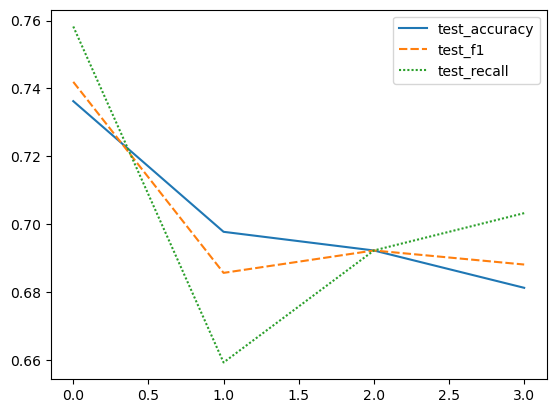

In [102]:
sns.lineplot(data=df_scores[['test_accuracy','test_f1','test_recall']])

## Prédiction liste de labels

In [124]:
labels = ['infox', 'entites_nommees', 'ouverture_esprit', 'faits', 'opinions',
       'propos_raportes', 'sources_citees', 'fausse_nouvelle', 'insinuations',
       'exageration', ]

In [123]:
df_ml = df_label

In [130]:
def get_df_ml(label,df_label):
    return df_label[df_label[label].notna()]

In [131]:
def get_balanced_df_ml(label,df_label):
    df_0 = df_label[df_label[label] == 0]
    df_1 = df_label[df_label[label] == 1]
    min_sample = min(len(df_0),len(df_1))
    df_0=df_0.sample(min_sample,random_state=_rs)
    df_1=df_1.sample(min_sample,random_state=_rs)
    df_ml = pd.concat([df_0,df_1])
    df_ml = df_ml.sample(frac=1,random_state=_rs)
    return df_ml

In [143]:
def get_scores(label,df_ml):
    logreg = LogisticRegression(random_state=_rs, solver='lbfgs', multi_class='ovr', max_iter=1000)
    sw = stopwords[:120]
    pipelineLR = Pipeline(steps = [
        ('vectorizer',TfidfVectorizer(preprocessor=None, tokenizer=None,stop_words=sw)), 
        ('logreg',logreg)
                      ])
    X = df_ml['text']
    y = df_ml[label]
    classifier = pipelineLR
    scores = cross_validate(classifier, X, y, cv=4,scoring=('roc_auc','f1','accuracy','precision','recall'))
    df_scores=pd.DataFrame(scores)
    score_dic = df_scores.mean().to_dict()
    score_dic['label']=label
    score_dic['n_samples']=len(df_ml)
    return score_dic

In [144]:
score_list = []
for label in labels:
    print(f'Processing {label}')
    df_ml = get_balanced_df_ml(label,df_label)
    score_list.append(get_scores(label,df_ml))

Processing infox
Processing entites_nommees
Processing ouverture_esprit
Processing faits
Processing opinions
Processing propos_raportes
Processing sources_citees
Processing fausse_nouvelle
Processing insinuations
Processing exageration


In [145]:
pd.DataFrame(score_list)

,fit_time,score_time,test_roc_auc,test_f1,test_accuracy,test_precision,test_recall,label,n_samples
0,0.310202,0.135108,0.855537,0.780041,0.782812,0.787273,0.774737,infox,746
1,0.259231,0.102077,0.749500,0.669483,0.675855,0.686674,0.657724,entites_nommees,614
2,0.044830,0.017593,0.510725,0.433007,0.451154,0.446561,0.435897,ouverture_esprit,102
3,0.200339,0.076552,0.665261,0.633274,0.627833,0.628427,0.639333,faits,454
4,0.321272,0.117270,0.762348,0.708224,0.707418,0.706110,0.711538,opinions,728
5,0.154062,0.071175,0.623490,0.604019,0.602041,0.603156,0.607143,propos_raportes,392
6,0.296947,0.108135,0.614159,0.548835,0.568323,0.571225,0.531289,sources_citees,644
7,0.125489,0.049627,0.676344,0.660693,0.647541,0.639315,0.688172,fausse_nouvelle,244
8,0.242274,0.092161,0.777024,0.713559,0.714286,0.714001,0.717549,insinuations,532
9,0.181241,0.065744,0.745591,0.674165,0.682961,0.690969,0.663584,exageration,350


# Sauvegarde des résultats
---

# Conclusions
---

# Bricolages
---